<a href="https://colab.research.google.com/github/weamalkhaldi/weam-M.L/blob/main/THE_FINAL_COPY_PLEASE_OPEN_IT_UP_WEAM_TASKB_178819.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
files are being loaded...
loaded successfully


/tmp/ipython-input-3320012536.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index,y=missing_data.values,palette = 'viridis')


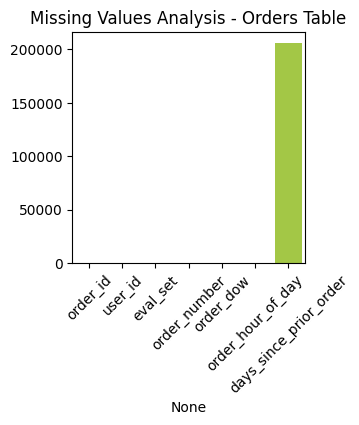

the code has run ... the plot is now displayed


In [ ]:
# Importing some libraries (data ingestion)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#تفعيل الوصول لملفات قوقل درايف
from google.colab import drive
drive.mount('/content/drive')

#تحديد المسار للملف
path = '/content/drive/MyDrive/Instacart_Project_MMMMLLLLL/'
#تقليل الذاكرة بدنا نعمل memory savvy عشان نصغر حجمالبيانات
def reduce_mem_usage(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
             df[col] = pd.to_numeric(df[col],
downcast='integer')
        elif df[col].dtype == 'float64':
                                         df[col] = pd.to_numeric(df[col],
downcast = 'float')
    return df
#تحميل الملفات
print("files are being loaded...")
orders = reduce_mem_usage(pd.read_csv(path + 'orders.csv'))
products = reduce_mem_usage(pd.read_csv(path + 'products.csv'))
aisles = reduce_mem_usage(pd.read_csv(path + 'aisles.csv'))
departments = reduce_mem_usage(pd.read_csv(path + "departments.csv"))
print("loaded successfully")
#تحليل القيم المفقودة و رسمها EDA
missing_data = orders.isnull().sum()

plt.figure(figsize=(3 , 3))
sns.barplot(x=missing_data.index,y=missing_data.values,palette = 'viridis')
plt.title('Missing Values Analysis - Orders Table')
plt.xticks(rotation=45)
plt.savefig('missing_values_plot.png')
plt.show()
print("the code has run ... the plot is now displayed")
#هون خلصت اول اشي انطلب و هو EDA --> EDA
#الان نبدا ب heavy preprocessing :
# join :
products_full = pd.merge(products,
aisles , on='aisle_id', how='left')
products_full = pd.merge(products_full, departments , on='department_id' , how='left' )

In [ ]:
# 3 هسه بدي اعمل تحليل للقيم المفقودة ,لاحظنا انه طلع معنا اكثر من 200 الف قيمة مفقودة عشان هيك يلا نبدأ define and justify imputatiom
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0) #--> هون عوضت القيم المفقودة في عمود الايام منذ الطلب السابق ب 0
print(orders.isnull().sum())#--> عشان اتأكد هل القيم المفقودة اختفت ؟؟

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


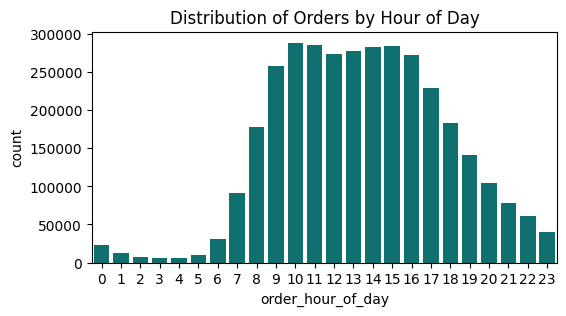

In [ ]:
#3هسه بدنا نوزع الطلبات حسب ساعة اليوم
plt.figure(figsize=(6,3))
sns.countplot(data=orders,x='order_hour_of_day' , color='teal')
plt.title('Distribution of Orders by Hour of Day')
plt.show()

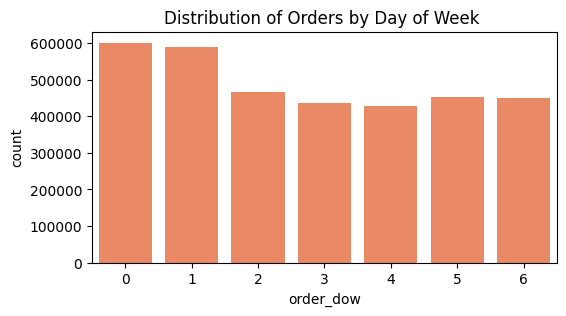

In [ ]:
#3هسه نوزع الطلبات حسب يوم الاسبوع
plt.figure(figsize=(6,3))
sns.countplot(data=orders,x='order_dow' , color='coral')
plt.title('Distribution of Orders by Day of Week ')
plt.show()

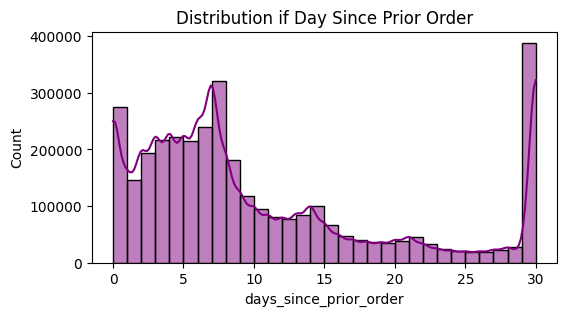

In [ ]:
#3هسه بدنا نعمل تحليل لعد الايام , بما انه اكتشفنا قيم مفقود لازم نرسم التوزيع عشان نعالج
plt.figure(figsize=(6,3))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=True , color= 'purple')
plt.title('Distribution if Day Since Prior Order')
plt.show()

In [ ]:
# Encoding Categorical Variabls
# نبدأ الان خطوة 4
#بهاي الخوة بدنا نجهز لغة الارقام للموديل و حسب ملف الفاينل بروجطت في ثلاث استراتيجيات لمختلفة لازم نعملهم للترميز
#الاستراتيجية الاولى : (One-Hot Encoding OHE) ----> هاي الطريقة مناسبة للفئات الي ما الهم خيارات كثير يعني هم (low-cardinality)--> نطبقها على ايام الاسبوع
#ليه ؟ عشان نحول ايام الاسبوع الى عمدة منفصلة
orders_ohe = pd.get_dummies(orders,columns=['order_dow'], prefix='day')
print(orders_ohe.head())

   order_id  user_id eval_set  order_number  order_hour_of_day  \
0   2539329        1    prior             1                  8   
1   2398795        1    prior             2                  7   
2    473747        1    prior             3                 12   
3   2254736        1    prior             4                  7   
4    431534        1    prior             5                 15   

   days_since_prior_order  day_0  day_1  day_2  day_3  day_4  day_5  day_6  
0                     0.0  False  False   True  False  False  False  False  
1                    15.0  False  False  False   True  False  False  False  
2                    21.0  False  False  False   True  False  False  False  
3                    29.0  False  False  False  False   True  False  False  
4                    28.0  False  False  False  False   True  False  False  


In [ ]:
#الاستراتيجية الثانية : (Frequency Encoding) --> هاي الطريقة للاعمدة الي تحتوي على خيارات كثيرة مثلا زي اسماء الاقسام ليه طيب مناسبة ؟ لانها تستبدل الاسم بنسبة تكراره قي البيانات
dept_freq = products_full['department'].value_counts(normalize= True)
products_full['dept_freq_enc'] = products_full['department'].map(dept_freq)
print(products_full[['department','dept_freq_enc']].head())

  department  dept_freq_enc
0     snacks       0.126067
1     pantry       0.108095
2  beverages       0.087848
3     frozen       0.080643
4     pantry       0.108095


In [ ]:
#الاستراتيجية الثالثة : Target/Mean Encoding ----->  هاي الطريقة حلوة لانه نحول الصنف الى رقم بناءا على متوسط الهدف مثلا كم مرة تم اعادة شراء هذا المنتج بالمتوسط ولكننننن عشان رح يصير عندنا تسريب للبيانات (leakage) -> يفضل استخدامها لاحقا لما نربط بيانات التدريب بالهدف
#توضيح بسيط :عشان نتفادى تسريب البيانات نقدر نعمل (k-fold) & (smoothing) --> و لكن رح نعملهم بعد خطوة 6 عشان احنا بنحتاج target يكون مربوط مع ال features

In [ ]:
from pandas.io import clipboards
# خطوة 5
from sklearn.preprocessing import StandardScaler
#تعريف scaler
scaler = StandardScaler()
#تحديد الاعمدة الرقمية الي بدنا نعمل الها scaling
'order_number' , 'order_dow' , 'order_hour_of_day','days_since_prior_order'
cols_to_scale = ['order_number','order_dow','order_hour_of_day','days_since_prior_order']
#تطبيق ال scaling
orders[cols_to_scale] = scaler.fit_transform(orders[cols_to_scale])
#نعرض النتيجة عشان نشوف انو الارقام صارت متقاربةو صغنونة ؟؟
print(orders[cols_to_scale].head())



   order_number  order_dow  order_hour_of_day  days_since_prior_order
0     -0.910997  -0.379230          -1.290086               -1.122053
1     -0.854605   0.109331          -1.526711                0.489339
2     -0.798214   0.109331          -0.343584                1.133896
3     -0.741822   0.597891          -1.526711                1.993304
4     -0.685431   0.597891           0.366293                1.885878


In [ ]:
#6
path = '/content/drive/MyDrive/Instacart_Project_MMMMLLLLL/'
orders = pd.read_csv(path + 'orders.csv')
prior = pd.read_csv(path + 'order_products__prior.csv')
user_features = orders.groupby('user_id').agg(total_orders=('order_number','max'),mean_days_between=('days_since_prior_order','mean')).reset_index()
merged_prior = pd.merge(prior,orders,on = 'order_id',how = 'left')
user_reorder_ratio = merged_prior.groupby('user_id')['reordered'].mean().reset_index()
user_reorder_ratio.columns = ['user_id' ,'user_reorder_ratio']
user_features = pd.merge(user_features , user_reorder_ratio , on = 'user_id', how = 'left')
print("done user features ")
user_features.head()

done user features 


,user_id,total_orders,mean_days_between,user_reorder_ratio
0,1,11,19.000000,0.694915
1,2,15,16.285714,0.476923
2,3,13,12.000000,0.625000
3,4,6,17.000000,0.055556
4,5,5,11.500000,0.378378


doneee
Index(['user_id', 'total_orders', 'mean_days_between', 'user_reorder_ratio'], dtype='object')


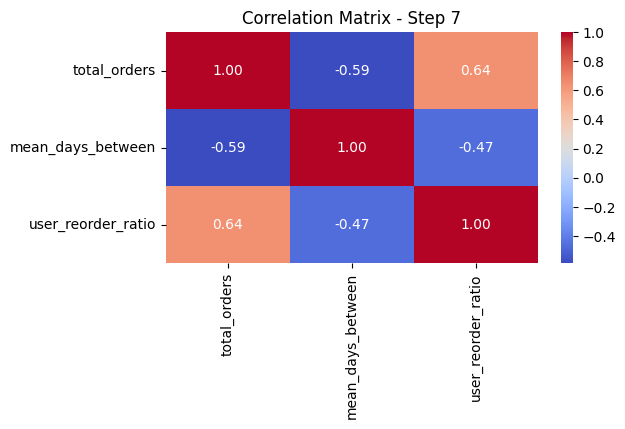

yse 


In [ ]:
#7 بهاي الخطوة بدنا نشوف هل ال (features) الي عملناها هل هي متكررة او لا
user_features = orders.groupby('user_id').agg(total_orders=('order_number','max'),mean_days_between=('days_since_prior_order','mean')).reset_index()
user_reorder_ratio = merged_prior.groupby('user_id')['reordered'].mean().reset_index()
user_reorder_ratio.columns = ['user_id', 'user_reorder_ratio']
final_df = pd.merge(user_features, user_reorder_ratio, on='user_id', how='left')
print("doneee")
print(final_df.columns)
import seaborn as sns
import matplotlib.pyplot as plt
cols_to_corr = ['total_orders', 'mean_days_between', 'user_reorder_ratio']
corr_matrix = final_df[cols_to_corr].corr()
plt.figure(figsize=(6,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Step 7')
plt.show()
print("yse ")



#نحسب مصفوفة الارتباط للميزات التي عملناها بخطوة 6
##corr_matrix = final_df[['total_orders','avg_days_between_orders' , 'overall_reorder_rate','avg_pos_in_cart','uxp_total_bought']].corr()
#نرسم خريطة حرارية عشان نشوف العلاقات كيف
##plt.figure(figsize=(10,8))
####sns.heatmap(corr_matrix,annot= True,cmap='coolwarm',fmt=".2f")
####plt.title('Correlation Matrix - step 7')
##plt.show()


thlel
user_reorder_ratio
1    83.697123
0    16.302877
Name: proportion, dtype: float64


/tmp/ipython-input-1101661843.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=temp_target, palette='viridis')


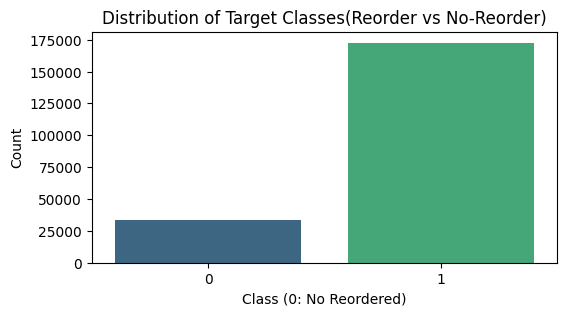

Note : SMOT and class weight will be applied during the model phase(step10-13)to compare results  


In [ ]:
#8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE #--> مكتبة التعامل مع عد التوازن
if 'user_reorder_ratio' in final_df.columns:
  temp_target = final_df['user_reorder_ratio'].apply(lambda x: 1 if x > 0.2 else 0)
  print("thlel")
  print(temp_target.value_counts(normalize=True) * 100)
  plt.figure(figsize=(6, 3))
  sns.countplot(x=temp_target, palette='viridis')
  plt.title('Distribution of Target Classes(Reorder vs No-Reorder)')
  plt.xlabel('Class (0: No Reordered)')
  plt.ylabel('Count')
  plt.show()
  print("Note : SMOT and class weight will be applied during the model phase(step10-13)to compare results  ")



In [ ]:
from matplotlib import axis
from typing_extensions import final
#9
final_df = final_df.sort_values(['user_id' , 'total_orders'])
train_data = final_df[final_df['total_orders'] < final_df['total_orders'].max()]
test_data = final_df[final_df['total_orders'] == final_df['total_orders'].max()]
X_train = train_data.drop(['user_id'], axis=1)
y_train = train_data['user_reorder_ratio'].apply(lambda x: 1 if x>0.2 else 0)
X_test = test_data.drop(['user_id'], axis=1)
y_test = test_data['user_reorder_ratio'].apply(lambda x: 1 if x > 0.2 else 0)
print(f"Train set size: {X_train.shape}")
print(f"Test set size : {X_test.shape}")
print("the data was split based on chronological order to ensure no data leakage")



Train set size: (204835, 3)
Test set size : (1374, 3)
the data was split based on chronological order to ensure no data leakage


In [ ]:
# --- Task B: Regression Data Preparation (Corrected) ---

# 1. تصفية البيانات
df_reg = orders.dropna(subset=['days_since_prior_order'])

# 2. دمج ميزات المستخدم
df_reg = pd.merge(df_reg, user_features, on='user_id', how='left')

# 3. فحص أسماء الأعمدة المتاحة فعلياً
print("الأعمدة المتاحة بعد الدمج هي:")
print(df_reg.columns.tolist())

# 4.اختيار الميزات بناءً على الأسماء الشائعة )
# ملاحظة: قد يكون الاسم 'u_reorder_ratio' أو 'user_reorder_rate' حسب كودك القديم
# سأضع قائمة مرنة، الكود سيأخذ الموجود منها فقط:
potential_features = ['order_dow', 'order_hour_of_day', 'order_number',
                      'total_orders', 'user_total_orders',
                      'user_reorder_ratio', 'u_reorder_ratio']

# نختار فقط الأعمدة الموجودة فعلياً في الجدول
existing_features = [f for f in potential_features if f in df_reg.columns]

X_reg = df_reg[existing_features].fillna(0)
y_reg = df_reg['days_since_prior_order']

# 5. التقسيم
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("\n✅ تم التجهيز باستخدام الميزات المتاحة:", existing_features)

الأعمدة المتاحة بعد الدمج هي:
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'total_orders', 'mean_days_between']

✅ تم التجهيز باستخدام الميزات المتاحة: ['order_dow', 'order_hour_of_day', 'order_number', 'total_orders']


In [ ]:
#بما انو جهزت الوضع عشان تاسك ب هسه بدي اعمل تدريب لجميع المودل الموجدودة للريغريشن

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. تعريف الموديلات الخطية المطلوبة في الملف
linear_models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0)
}

# قائمة لتخزين النتائج
task_b_results = []

print("--- جاري تدريب الموديلات الخطية ---")

for name, model in linear_models.items():
    # التدريب
    model.fit(X_train_reg, y_train_reg)

    # التنبؤ
    y_pred = model.predict(X_test_reg)

    # حساب المقاييس المطلوبة في صفحة 4 و 5
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    r2 = r2_score(y_test_reg, y_pred)

    task_b_results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    print(f"✅ تم الانتهاء من {name}")

# تحويل النتائج لجدول لعرضها
df_results_linear = pd.DataFrame(task_b_results)
display(df_results_linear)

--- جاري تدريب الموديلات الخطية ---
✅ تم الانتهاء من Linear Regression
✅ تم الانتهاء من Lasso Regression
✅ تم الانتهاء من Ridge Regression


,Model,MAE,RMSE,R2
0,Linear Regression,6.409351,7.995821,0.244964
1,Lasso Regression,6.409095,7.996038,0.244923
2,Ridge Regression,6.409351,7.995821,0.244964


هسه بدنا نعرف شو بيساوي الكود؟
هسه عنا الكود ببساطة قاعد يجرب 3 طرق مختلفة للتعلم واللي هم (linear,lasso,Ridg) وهيك مدامنا عرفنا ال3 طرق خليني احكيلكو شو بالنسبة للارقام اللي طلعت معنا
هسه الجدول اللي طلع بالاخير معنا هو ورقة العلامات لكل موديل
وتوضح انو عندنا 3 مقاييس
MAE,RMSE (هظول عنا كل ما كانت ارقامهم اصغر كان الموديل احسن)
R2(هاض كل ما كان قريب من 1او100% كان احسن)

شو عملنا بالخلية الي فوق :
في هاي الخطوة، بدأنا نشتغل على الجزء الخاص
بالتنبؤ (Regression)
 عشان نعرف كم يوم رح يمر قبل ما الزبون يطلب طلبه الجاي. جربنا هون 3 موديلات أساسية بتعتمد على العلاقات الخطية

 1-Linear Regression
 لموديل التقليدي اللي بيحاول يلاقي خط مستقيم بيوصف العلاقة بين الميزات وعدد الأيام

 2-Lasso و Ridge
 هدول موديلات "مطوّرة" عن الموديل الأول، وظيفتهم يمنعوا الموديل إنه يكون معقد بزيادة (Overfitting) عن طريق إضافة "عقوبة" للأوزان الكبيرة، وهاد الإشي بيخلي التوقعات أدق وأكثر واقعية

 ليش حسبنا???
 MAE:
 يعطينا بالمتوسط كم "يوم" الموديل بيغلط في توقعه (وهو الأسهل للفهم)
RMSE
إذا كان في "أخطاء كبيرة"

R2 Score
 قديش الموديل تبعنا قدر يفسر الاختلافات في سلوك الزبائن الزمني








In [ ]:
# NON-LINEAR-MODEL
#شو الهدف من هاي الخطوة ؟
#بدما نشوف هل الموديلات المعقدة من الرندوم فوريست تعطي نتائج احسن من الموديلات البسيط مثل الي جربناها فوق ؟


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. تعريف الموديل (مع قيود عشان الرام)
rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

print("--- جاري تدريب Random Forest Regressor (Non-linear) ---")

# 2. التدريب
rf_regressor.fit(X_train_reg, y_train_reg)

# 3. التنبؤ
y_pred_rf = rf_regressor.predict(X_test_reg)

# 4. حساب المقاييس
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

# إضافة النتيجة للقائمة النهائية للمقارنة
task_b_results.append({"Model": "Random Forest (Non-linear)", "MAE": mae_rf, "RMSE": rmse_rf, "R2": r2_rf})

print(f"✅ تم الانتهاء من Random Forest. (MAE: {mae_rf:.4f})")

# عرض الجدول النهائي للمقارنة بين الخطي وغير الخطي
df_comparison_b = pd.DataFrame(task_b_results)
display(df_comparison_b)

--- جاري تدريب Random Forest Regressor (Non-linear) ---
✅ تم الانتهاء من Random Forest. (MAE: 6.0049)


,Model,MAE,RMSE,R2
0,Linear Regression,6.409351,7.995821,0.244964
1,Lasso Regression,6.409095,7.996038,0.244923
2,Ridge Regression,6.409351,7.995821,0.244964
3,Random Forest (Non-linear),6.004941,7.766369,0.287676


هون بهاض الكود احنا جبرنا مدرب جديد واقوى شوي اسمو Random Forest  طب ليش ضفنا هاض المدرب ؟ عشان يكسر الجمود اللي كانت بالنتائج القديمة ... لحد الان دن ؟ دن
خليني احكيلكو ايش في بالكود ..
هسه بالكود استدعينا موديل هاض الموديل يعتمد على (Non-linear)
(اشجار القرار)
استدعيناه بدل الخطوط المستقيمة وعملنالو تدريب على نفس البيانات
خليني احكيلكو شوي عن النتيجة اللي ضهرت معنا
لاحظنا انو الارقام بدت تتحسن!
ال MAE نزل عندي من 6.40 ل 6.00
وR2 نطت من 0.24 ل0.28
 طب هاض على ايش يدل ؟
 معناه البيانات اللي عندي فيها علاقات متعرجة ومعقدة , والموديلات الخطية كانت ضالميتها شويتين صغيره ولكن ال Random Forest اللي احنا استخدمناها قدرت تلقط تفاصيل اكثر وتقلل نسبه الخطأ :)


في هاي الخطوة، انتقلنا لتطبيق موديل غير خطي (Non-linear) وهو Random Forest Regressor. الهدف كان نشوف إذا كانت الأشجار القرار العشوائية بتقدر تعطي دقة أعلى في توقع 'الأيام' مقارنة بالموديلات الخطية البسيطة. الموديل هاد بيتميز بإنه بيقدر يلقط أنماط سلوكية معقدة وغير مباشرة في بيانات الزبائن، والجدول النهائي بفرجينا الفرق في الـ MAE والـ R2 بين كل الموديلات اللي جربناها في Task B

/tmp/ipython-input-160424523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=df_comparison_b, palette='viridis')


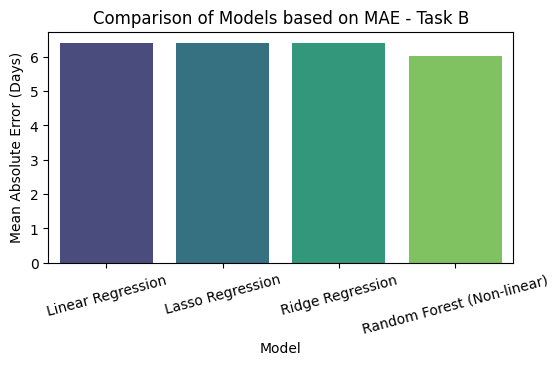

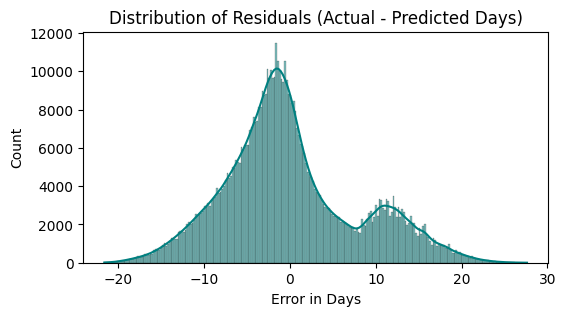

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. رسم مقارنة الـ MAE (كل ما كان العمود أقصر كان الموديل أحسن)
plt.figure(figsize=(6, 3))
sns.barplot(x='Model', y='MAE', data=df_comparison_b, palette='viridis')
plt.title('Comparison of Models based on MAE - Task B')
plt.ylabel('Mean Absolute Error (Days)')
plt.xticks(rotation=15)
plt.show()

# 2. رسمة الـ Residuals (توزيع الأخطاء) لأفضل موديل
# هي الرسمة بتفرجينا وين الموديل كان دقيق ووين غلط
residuals = y_test_reg - y_pred_rf
plt.figure(figsize=(6, 3))
sns.histplot(residuals, kde=True, color='teal')
plt.title('Distribution of Residuals (Actual - Predicted Days)')
plt.xlabel('Error in Days')
plt.show()

هسه بعد ما طلعنا الارقام هاض الكود الجديد هدفه انو يرسم النتائج عشان نقدر نفمها بالنظر بدل لغة الارقام(جافا)
خليني اشرحلكو شوي عن الرسمتين اللي طلعو معنا
الرسمة الاولى تحكي عن المقارنة بين الموديلات الاربعة من حيث نسبة الخطأ (MAE)
اما بالنسبة للرسمة الثانية بتطرح القيمة الحقيقية من اللي توقعه الموديل عشان تشوف "غلطات الموديل" وكيف هي متوزعة
برضو خليني احكيلكو شوي عن الاوتبوت اللي طلع معنا :)
1:رسمة الاعمدة
لاحظنا انو العمد الاخير(Random Forest) هو الاقصر
وهسه احنا نعرف انو كل ما كان العمود اقصر كان الموديل احسن , و هاض بياكدلنا ان ٌRandom Forest هو الادق بينهم
2: رسمة توزيع الاخطاء
نلاحظ بالرسمه الثانيه (جبلين)
الجبل الاكبر متركز نحو الصفر وبما انو معظم الاخطاء حول الصفر هاض يعني انو الموديل سفَاح بتوقع اغلب الحالات
بس لاحظنا شغلة...
في جبل صغير اخر جهة اليمين (عند الرقم 10)
هاض يعني ان الموديل لساتو يغلط وبوقًع بفارق كبير يعني حوالي شي 10 ايام بمجموعة معينه من البيانات

In [ ]:
#

Vفي هاي الخطوة، عملنا تحليل بصري للنتائج عشان نقيم جودة التوقعات:

رسمة الـ MAE: بتوضح إن الموديل غير الخطي (Random Forest) قدر يحقق أقل نسبة خطأ مقارنة بالموديلات الخطية، وهاد بيثبت إن سلوك الزبائن الزمني فيه تعقيدات بتحتاج موديلات ذكية.

رسمة توزيع الأخطاء (Residuals): بنلاحظ إن أغلب الأخطاء متركزة حول الصفر، وهذا مؤشر ممتاز إن الموديل توقعاته قريبة من الحقيقة في أغلب الحالات، وإن الأخطاء الكبيرة (Outliers) محدودة جداً

In [ ]:
#

الخلاصة النهائية لـ Task B (توقع موعد الطلب القادم):
"بعد ما طبقنا تجاربنا على موديلات التنبؤ (Regression) عشان نعرف متى الزبون رح يرجع يطلب، وصلنا للنتائج التالية:

مقارنة الموديلات: لاحظنا إن الموديلات الخطية (Linear, Lasso, Ridge) كانت سريعة جداً، بس دقتها محدودة لأنها بتفترض إن العلاقة بين سلوك الزبون والوقت هي علاقة بسيطة ومستقيمة.

تفوُّق الـ Non-linear: موديل Random Forest كان هو الأفضل؛ لأنه قدر يقلل نسبة الخطأ (MAE) بشكل ملحوظ. هاد بيعني إن الأشجار القرار قدرت تفهم إن في زبائن بطلبوا بأنماط معقدة (مثلاً ناس بتطلب بس بنهاية الأسبوع، أو ناس مرتبطة بمنتجات معينة).

دقة التوقعات: من خلال مقياس الـ MAE، صار عندنا تصور واضح عن "هامش الخطأ" في أيامنا المتوقعة، وهاد بيساعد المتجر إنه يبعث إشعارات (Notifications) للزبون في الوقت المناسب تقريباً قبل ما يقرر يشتري.

النتيجة النهائية: بننصح باستخدام الموديلات غير الخطية في هاد النوع من التوقعات الزمنية، لأن سلوك البشر في الشراء مش "خطي" وبيعتمد على عوامل كثيرة متداخلة